In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### 1. Grid 이해하기
Grid는 축과 평행한 선을 이용해 거리 및 값 정보를 보조적으로 제공한다.

* `Color` : 색은 다른 값들을 방해하지 않기 위해 무채색
* `zorder` : Layer 순서 상 맨 밑에 오도록 조정한다
* `which='major', 'minor', 'both'` : 큰/세부 격자
* `axis='x', 'y', 'both'` : x,y축과 동시에
* `linestyle`
* `linewidth`

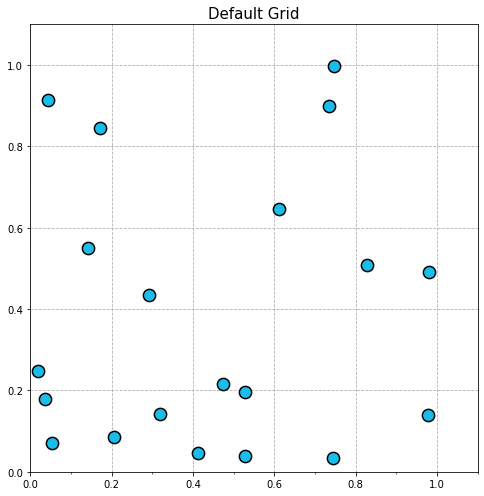

In [18]:
x = np.random.rand(20)
y = np.random.rand(20)

fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150,
          c='#1ABDE9',
          linewidth=1.5,
          edgecolor='black', zorder=10)

#minor 사용
ax.set_xticks(np.linspace(0, 1.1, 12, endpoint=True), minor=True)

ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

#ax.grid(zorder=0, linestyle='--', which='both') # minor와 기본 ticks 둘다
#ax.grid(zorder=0, linestyle='--', which='minor') # minor ticks에만

#ax.grid(zorder=0, linestyle='--', axis='y') # y축만 그려주기
#ax.grid(zorder=0, linestyle='--', linewidth=2) # linewidth를 사용해 두껍게 그리기

ax.grid(zorder=0, linestyle='--')

ax.set_title(f'Default Grid', fontsize=15)

plt.tight_layout()
plt.show()

### 1.2. 다양한 타임의 Grid
Grid는 사용자에 목적에 따라 다양한 축으로 활용될 수 있다.


####  X + Y = C를 사용한 Grid
* 회색선에 걸치는 값은 X + Y 값이 동일

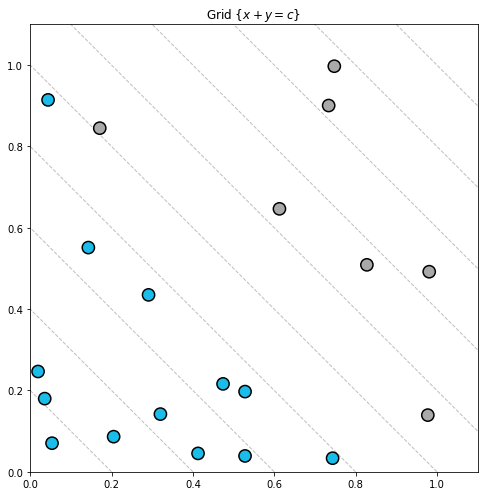

In [23]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150,
           # xy의 합이 1보다 작으면 '#1ABED9' 아니면 'darkgray'색으로
          c=['#1ABDE9' if xx+yy < 1.0 else 'darkgray' for xx, yy in zip(x, y)],
          linewidth=1.5,
          edgecolor='black', zorder=10)

# Grid Part, x축으로 0부터 0.2 간격으로 12개의 값을 구함
x_start = np.linspace(0, 2.2, 12, endpoint=True)

for xs in x_start:
    ax.plot([xs, 0], [0, xs], linestyle='--', color='gray', alpha=0.5, linewidth=1)
    
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r'Grid (x+y = c$)')

plt.tight_layout()
plt.show()

####  Y = CX를 사용한 Grid

* 가까울수록 Y/X가 커짐
* Feature의 비율이 중요한 경우 활용
    - 수학/영어 점수 비율 구하기

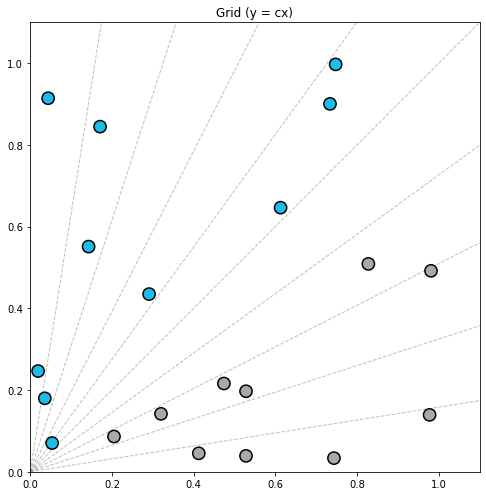

In [27]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150,
          c=['#1ABDE9' if yy/xx >= 1.0 else 'darkgray' for xx, yy in zip(x, y)],
          linewidth=1.5,
          edgecolor='black', zorder=10)

# Grid
radian = np.linspace(0, np.pi/2, 11, endpoint=True)

for rad in radian:
    ax.plot([0,2], [0, 2*np.tan(rad)], linestyle='--', color='gray', alpha=0.5, linewidth=1)
    
    
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r'Grid (y = cx)')

plt.tight_layout()
plt.show()

####  동심원을 사용한 Grid

* 특정 지점에서 거리를 측정
* 가장 가까운 포인트 찾기
* 한 데이터에서 특정 범위의 데이터 지정

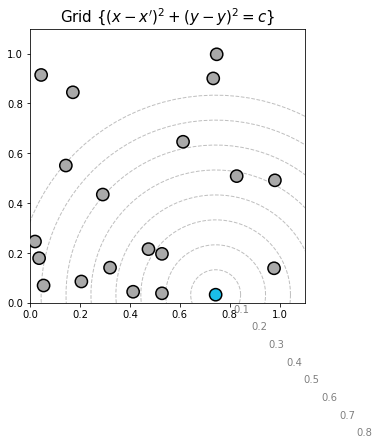

In [35]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.scatter(x, y, s=150,
          c=['darkgray' if i != 2 else '#1ABDE9' for i in range(20)],
          linewidth=1.5,
          edgecolor='black', zorder=10)

# Grid
rs = np.linspace(0.1, 0.8, 8, endpoint=True)

for r in rs:
    xx = r*np.cos(np.linspace(0, 2*np.pi, 100))
    yy = r*np.sin(np.linspace(0, 2*np.pi, 100))
    # (x[2],y[2])가 원의 중심
    ax.plot(xx+x[2], yy+y[2], linestyle='--', color='gray', alpha=0.5, linewidth=1)
    
    # text정보 추가
    ax.text(x[2]+r*np.cos(np.pi/4), y[2]-r*np.sin(np.pi/4), f'{r:.1}',  color='gray')
    
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)

ax.set_title(r"Grid {$(x-x')^2+(y-y)^2=c$}", fontsize=15)

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

student = pd.read_csv('./StudentsPerformance.csv')

###  2.1 선(Line) 추가하기
* `axvline()` : 세로선
* `axhline()` : 가로선

직교좌표계에서 평행선을 원하는 부분 그릴 수 있다.

선은 Plot으로 그리는게 더 편할 수 있으니 편하게 쓰자.

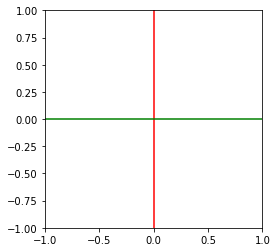

In [37]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvline(0, color='red')
ax.axhline(0, color='green')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

ax의 전체 구간을 0과 1로 정한 뒤 특정 부분에만 선을 그릴 수 있다.

이런건 plot이 더 편하다.

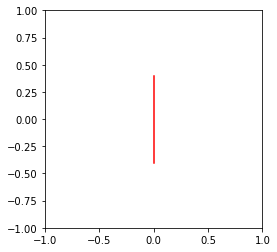

In [39]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvline(0, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

In [43]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


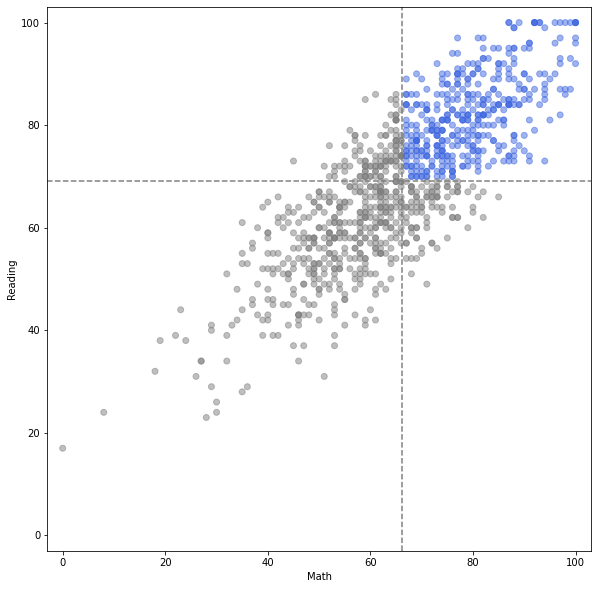

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

ax.axvline(math_mean, color='gray', linestyle='--')
ax.axhline(reading_mean, color='gray', linestyle='--')

ax.scatter(student['math score'], student['reading score'],
          alpha=0.5,
          color=['royalblue' if (m>math_mean and r>reading_mean) \
                 else 'gray' for m,r in zip(student['math score'],student['reading score'])],
          zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

###  2.2 면(Span) 추가하기

* axvspan
* axhspan

선과 함께 특정 부분 면적을 표시할 수 있다.

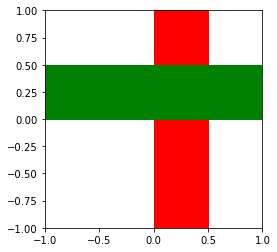

In [55]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvspan(0, 0.5, color='red')
ax.axhspan(0, 0.5, color='green')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

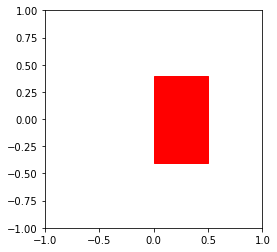

In [56]:
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.axvspan(0, 0.5, ymin=0.3, ymax=0.7, color='red')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

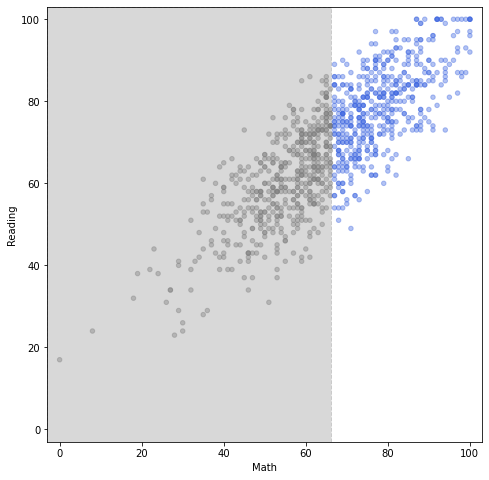

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect(1)

math_mean = student['math score'].mean()
reading_mean = student['reading score'].mean()

# 평균보다 낮은 값들은 회색으로 칠해주어 잘 안보이게 막아주는 효과
ax.axvspan(-3, math_mean, color='gray', linestyle='--', zorder=0, alpha=0.3)

ax.scatter(x=student['math score'], y=student['reading score'],
          alpha=0.4, s=20,
          color=['royalblue' if m > math_mean else 'gray' for m in student['math score']],
          zorder=10,
          )

ax.set_xlabel('Math')
ax.set_ylabel('Reading')

ax.set_xlim(-3, 103)
ax.set_ylim(-3, 103)
plt.show()

###  2.3 Spines(변)
* `ax.spines` : 4가지 변을 조정하는
    * `set_visible`
    * `set_linewidth`
    * `set_position`

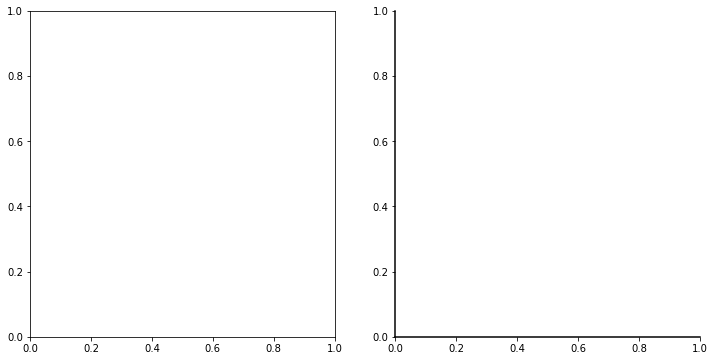

In [62]:
fig = plt.figure(figsize=(12, 6))

_ = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
plt.show()

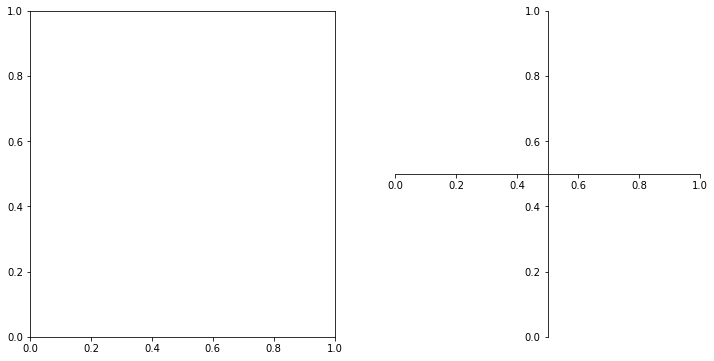

In [63]:
fig = plt.figure(figsize=(12, 6))

_ = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 2, 2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()

축은 중심('center')외에도 원하는 부분으로 옮길 수 있다.
* `center` -> ('axes', 0.5) : 축의 비율로 정하고 싶을땐 'axes'
* `zero` -> ('data', 0.5) : 특정 데이터 위치를 기준으로 이동하고 싶을때 'data'

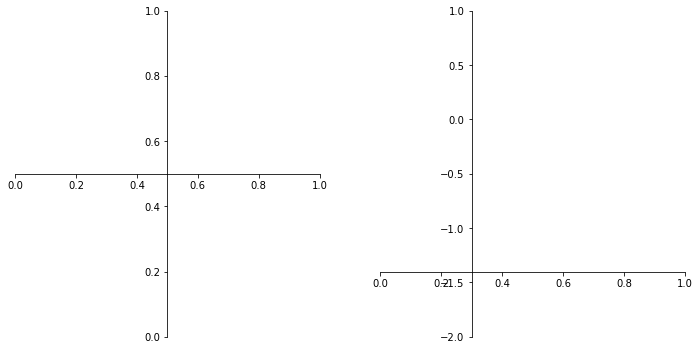

In [69]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
ax1.spines['left'].set_position('center')
ax1.spines['bottom'].set_position('center')

ax2.spines['left'].set_position(('data', 0.3))
ax2.spines['bottom'].set_position(('axes', 0.2))

ax2.set_ylim(-2, 1)
plt.show()

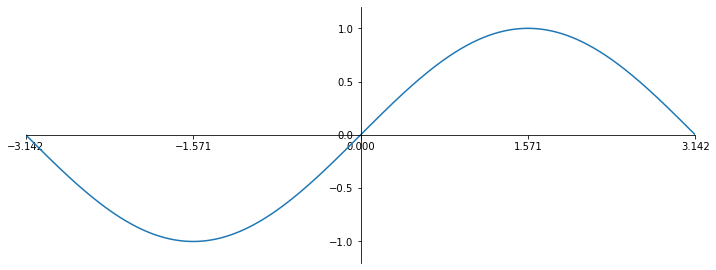

In [73]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(aspect=1)

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

ax.plot(x, y)

ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.2, 1.2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
#ax.set_xtickslabels([r'$\pi$, r'-$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'],)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
plt.show()

###  2.4 THEME 추가하기
